This file aimes to generate a combined analysis of all sources by counting the number of articles that were released per month

Here I just read through all the json files that I extracted through the webdriver in the other python files

In [1]:
import json

years = ['2021', '2022', '2023']

dps_results_map = {}
for year in years:
    
    f = open(f'archive/DPS/OLS/{year}.json')
    data = json.load(f)
    dps_results_map[year] = data

In [2]:
months = ['01', '02', '03', '04','05', '06','07', '08', '09', '10','11', '12']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


gov_results_map = {}
# gov_no_results_map = {}
for year in years:
    year_map = {}
    # no_year_map = {}
    
    if year == '2023':
        months = months[0:2]
    for i, month in enumerate(months):
        f = open(f'archive/OLS/{year}/{month}.json')
        data = json.load(f)
        year_map[month_names[i]] = data
        
    gov_results_map[year[2:]] = year_map

In [3]:
tmd_results_map = {}
# tmd_no_results_map = {}
for year in years:
    year_map = {}
    no_year_map = {}
    
    f = open(f'archive/TMD/OLS/{year}.json')
    data = json.load(f)
    tmd_results_map[year] = data

In [3]:
# manually count articles uploaded for each month 
dps_num = [0, 0, 0, 0, 3, 5, 2, 0, 5, 3, 2, 4, 3, 1, 0, 2, 2, 0, 0, 1, 3, 0, 1, 0, 0, 0]
tmd_num = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0]
len(dps_num)

26

In [24]:
sum(tmd_num)

10

In [25]:
# save all counts in a dict
num_art = {}
i = 0
gov_count = 0
for year, months in gov_results_map.items():
    for month, text in months.items():
        month_art = {}
        month_art['gov'] = len(text)
        gov_count += len(text)
        month_art['dps'] = dps_num[i]
        month_art['tmd'] = tmd_num[i]
        i+=1
        
        num_art[f'{month} {year}'] = month_art

print(gov_count)
num_art

93


{'Jan 21': {'gov': 0, 'dps': 0, 'tmd': 0},
 'Feb 21': {'gov': 0, 'dps': 0, 'tmd': 0},
 'Mar 21': {'gov': 5, 'dps': 0, 'tmd': 0},
 'Apr 21': {'gov': 2, 'dps': 0, 'tmd': 0},
 'May 21': {'gov': 1, 'dps': 3, 'tmd': 0},
 'Jun 21': {'gov': 1, 'dps': 5, 'tmd': 0},
 'Jul 21': {'gov': 0, 'dps': 2, 'tmd': 0},
 'Aug 21': {'gov': 3, 'dps': 0, 'tmd': 0},
 'Sep 21': {'gov': 5, 'dps': 5, 'tmd': 0},
 'Oct 21': {'gov': 3, 'dps': 3, 'tmd': 0},
 'Nov 21': {'gov': 2, 'dps': 2, 'tmd': 0},
 'Dec 21': {'gov': 2, 'dps': 4, 'tmd': 0},
 'Jan 22': {'gov': 0, 'dps': 3, 'tmd': 1},
 'Feb 22': {'gov': 4, 'dps': 1, 'tmd': 2},
 'Mar 22': {'gov': 5, 'dps': 0, 'tmd': 0},
 'Apr 22': {'gov': 10, 'dps': 2, 'tmd': 2},
 'May 22': {'gov': 5, 'dps': 2, 'tmd': 0},
 'Jun 22': {'gov': 4, 'dps': 0, 'tmd': 0},
 'Jul 22': {'gov': 6, 'dps': 0, 'tmd': 3},
 'Aug 22': {'gov': 5, 'dps': 1, 'tmd': 0},
 'Sep 22': {'gov': 5, 'dps': 3, 'tmd': 0},
 'Oct 22': {'gov': 5, 'dps': 0, 'tmd': 2},
 'Nov 22': {'gov': 5, 'dps': 1, 'tmd': 0},
 'Dec 22':

In [6]:
# delete empty months
del num_art['Jan 21']
del num_art['Feb 21']

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(font='Times New Roman')

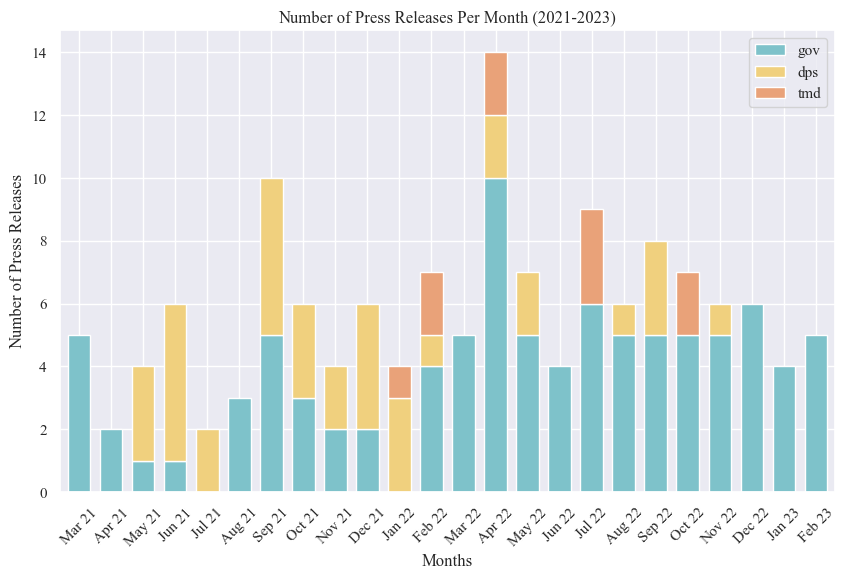

In [10]:
# save as pandas dataframe and graph using pyplot 

df = pd.DataFrame(num_art).T

sns.set(style="darkgrid")
my_palette = ['#7EC2CA', '#F0D07E', '#E9A279']
sns.set(font='Times New Roman')

ax = df.plot.bar(stacked=True, figsize=(10, 6), color=my_palette, width=0.7)

plt.xticks(rotation=45)
ax.set_xlabel('Months')
ax.set_ylabel('Number of Press Releases')
ax.set_title('Number of Press Releases Per Month (2021-2023)')
ax.legend()

plt.savefig('images/num_art_all.png')
plt.show()

## Experimental code 

ValueError: 'upper' is not a valid value for align; supported values are 'top', 'bottom', 'center', 'baseline', 'center_baseline'

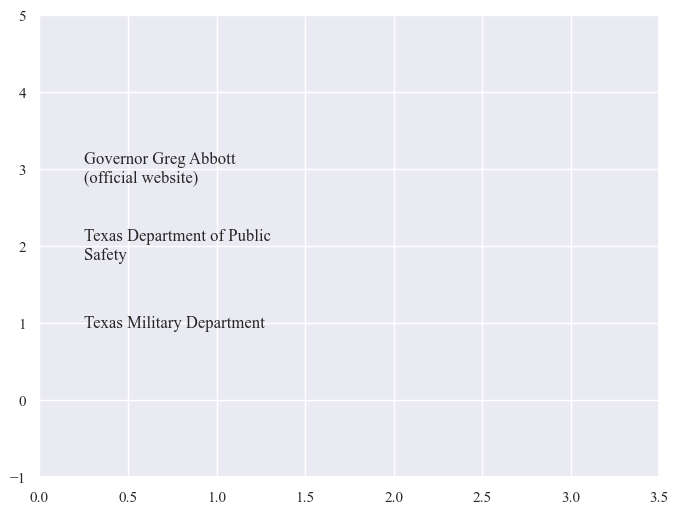

In [21]:
plt.rcParams['font.family'] = 'Times New Roman'

fig, ax = plt.subplots(figsize=(8,6))
rows = 4
cols = 3

ax.set_ylim(-1, rows + 1)
ax.set_xlim(0, cols + .5)

ax.text(x=.25, y=3, s='Governor Greg Abbott \n(official website)', va='center', ha='left')
ax.text(x=.25, y=2, s='Texas Department of Public \nSafety', va='center', ha='left')
ax.text(x=.25, y=1, s='Texas Military Department', va='center', ha='left')

ax.text(x=2, y=3, s='https://gov.texas.gov/news/category/press-release', va='center', ha='left')


# for i, (_, row) in enumerate(df_top15.iterrows()):

#     ax.text(x=.5, y=rows-i-1, s=row['Trigram'], va='center', ha='left')
#     ax.text(x=2, y=rows-i-1, s=row['Frequency'], va='center', ha='right', weight='bold')
    
# ax.text(.5, 15, 'Trigram', weight='bold', ha='left')
# ax.text(2, 15, 'Frequency', weight='bold', ha='right')

# for row in range(rows):
#     ax.plot(
#         [cols-1.75, cols+0.25],
#         [row -.5, row - .5],
#         ls=':',
#         lw='.5',
#         c='grey'
#     )
    
# ax.plot([cols-1.75, cols+0.25], [14.75, 14.75], lw='.5', c='black')
# # ax.plot([cols-1.75, cols+0.25], [14.65, 14.65], lw='.5', c='black')

# ax.plot([cols-1.75, cols+0.25], [15.7, 15.7], lw='.5', c='black')
# # ax.plot([cols-1.75, cols+0.25], [15.6, 15.6], lw='.5', c='black')

# ax.axis('off')
# ax.set_title(
#     '3-grams Frequencies for Gov. Abbott Tweets',
#     loc='center',
#     fontsize=12,
#     weight='bold'
# )

# plt.savefig('Trigrams/gov_trigrams.png')